

#Stock Market Prediction And Forecasting Using Stacked LSTM



In [1]:
import os 
import pandas_datareader as pdr
import numpy as np


In [2]:
key='34dd0eae8b7c53d81a996c5d1c3774827c011f50'
df=pdr.get_data_tiingo('AAPL',api_key=key)
df.head()

close    high  ...  divCash  splitFactor
symbol date                                       ...                      
AAPL   2016-05-27 00:00:00+00:00  100.35  100.47  ...      0.0          1.0
       2016-05-31 00:00:00+00:00   99.86  100.40  ...      0.0          1.0
       2016-06-01 00:00:00+00:00   98.46   99.54  ...      0.0          1.0
       2016-06-02 00:00:00+00:00   97.72   97.84  ...      0.0          1.0
       2016-06-03 00:00:00+00:00   97.92   98.27  ...      0.0          1.0

[5 rows x 12 columns]

In [3]:
df.to_csv('AAPL.csv')

In [4]:
import pandas as pd
df=pd.read_csv('AAPL.csv')
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2016-05-27 00:00:00+00:00,100.35,100.47,99.245,99.44,36341240,23.433074,23.461096,23.175042,23.220577,145364960,0.0,1.0
1,AAPL,2016-05-31 00:00:00+00:00,99.86,100.40,98.820,99.60,42307212,23.318653,23.444750,23.075799,23.257939,169228848,0.0,1.0
2,AAPL,2016-06-01 00:00:00+00:00,98.46,99.54,98.330,99.02,29173285,22.991734,23.243929,22.961377,23.122502,116693140,0.0,1.0
3,AAPL,2016-06-02 00:00:00+00:00,97.72,97.84,96.630,97.60,40191600,22.818934,22.846956,22.564404,22.790913,160766400,0.0,1.0
4,AAPL,2016-06-03 00:00:00+00:00,97.92,98.27,97.450,97.79,28504888,22.865637,22.947367,22.755885,22.835280,114019552,0.0,1.0


In [5]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,AAPL,2021-05-19 00:00:00+00:00,124.69,124.915,122.86,123.16,92611989,124.69,124.915,122.86,123.16,92611989,0.0,1.0
1253,AAPL,2021-05-20 00:00:00+00:00,127.31,127.720,125.10,125.23,76857123,127.31,127.720,125.10,125.23,76857123,0.0,1.0
1254,AAPL,2021-05-21 00:00:00+00:00,125.43,128.000,125.21,127.82,79295436,125.43,128.000,125.21,127.82,79295436,0.0,1.0
1255,AAPL,2021-05-24 00:00:00+00:00,127.10,127.940,125.94,126.01,63092945,127.10,127.940,125.94,126.01,63092945,0.0,1.0
1256,AAPL,2021-05-25 00:00:00+00:00,126.90,128.320,126.32,127.82,72009482,126.90,128.320,126.32,127.82,72009482,0.0,1.0


In [6]:
df.shape

(1257, 14)

In [7]:
##reset index
df1 = df.reset_index()['close']
df1

0       100.35
1        99.86
2        98.46
3        97.72
4        97.92
         ...  
1252    124.69
1253    127.31
1254    125.43
1255    127.10
1256    126.90
Name: close, Length: 1257, dtype: float64

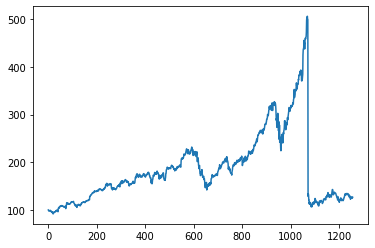

In [8]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [9]:
df1

0       100.35
1        99.86
2        98.46
3        97.72
4        97.92
         ...  
1252    124.69
1253    127.31
1254    125.43
1255    127.10
1256    126.90
Name: close, Length: 1257, dtype: float64

In [10]:
## LSTM are senstive to the scaleable data so, we apply MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
df1

array([[0.02007004],
       [0.01888661],
       [0.01550537],
       ...,
       [0.08064243],
       [0.08467576],
       [0.08419273]])

In [11]:
## splitting into testing & training
training_size =int(len(df1)*0.65)
test_size = len(df1) - training_size
train_data,test_data = df1[0 : training_size , : ] , df1[training_size : len(df1),:1] 

In [12]:
training_size,test_size

(817, 440)

In [13]:
train_data

array([[0.02007004],
       [0.01888661],
       [0.01550537],
       [0.01371815],
       [0.01420118],
       [0.01591595],
       [0.01688202],
       [0.01666465],
       [0.01837942],
       [0.01639899],
       [0.01280039],
       [0.01309021],
       [0.01231735],
       [0.01330757],
       [0.0079459 ],
       [0.00739041],
       [0.0093467 ],
       [0.00847724],
       [0.00980558],
       [0.00328463],
       [0.        ],
       [0.00374351],
       [0.00569979],
       [0.008598  ],
       [0.00929839],
       [0.00712474],
       [0.00842893],
       [0.00941915],
       [0.01120638],
       [0.01193093],
       [0.0129936 ],
       [0.01166526],
       [0.01630238],
       [0.01627823],
       [0.01881415],
       [0.01891076],
       [0.01912812],
       [0.01784809],
       [0.01598841],
       [0.01280039],
       [0.01118222],
       [0.02634947],
       [0.02970656],
       [0.02939259],
       [0.03383649],
       [0.03004468],
       [0.03320855],
       [0.033

In [14]:
#convert an array of values into a dataset_matrix
def create_dataset(dataset, time_step=1):
  data_x, data_y = [],[]
  for i in range(len(dataset) - time_step-1):
    a = dataset[i:(i+time_step), 0] # i=0,  0,1,2,3......99    =100
    data_x.append(a)
    data_y.append(dataset[i + time_step, 0]) 
  return np.array(data_x) , np.array(data_y)


In [15]:
##reshape into x=t,t+1,t+2,t+3 and y=t+4
time_step=100
x_train,y_train = create_dataset(train_data, time_step)
x_test,y_test = create_dataset(test_data, time_step)


In [16]:
print(x_train.shape) , print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [17]:
print(x_test.shape) , print(y_test.shape)

(339, 100)
(339,)


(None, None)

In [18]:
# reshape input to be [sample , time_step,features]WHICH is required for LSTM
# 2 dimension se 3 dimension mai convert kiya h
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)


In [19]:
x_train.shape , x_test.shape

((716, 100, 1), (339, 100, 1))

In [20]:
from tensorflow.keras.layers import Dense,LSTM
from tensorflow.keras.models import Sequential

In [21]:
## create the model
model=Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(units=50,return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error')


In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 1s 85ms/step - loss: 1.6905e-04 - val_loss: 0.0085
Epoch 2/100
12/12 [==============================] - 1s 84ms/step - loss: 1.6465e-04 - val_loss: 0.0090
Epoch 3/100
12/12 [==============================] - 1s 83ms/step - loss: 1.5902e-04 - val_loss: 0.0088
Epoch 4/100
12/12 [==============================] - 1s 82ms/step - loss: 1.5194e-04 - val_loss: 0.0090
Epoch 5/100
12/12 [==============================] - 1s 82ms/step - loss: 1.5660e-04 - val_loss: 0.0086
Epoch 6/100
12/12 [==============================] - 1s 82ms/step - loss: 1.5185e-04 - val_loss: 0.0084
Epoch 7/100
12/12 [==============================] - 1s 84ms/step - loss: 1.6010e-04 - val_loss: 0.0081
Epoch 8/100
12/12 [==============================] - 1s 82ms/step - loss: 1.5882e-04 - val_loss: 0.0083
Epoch 9/100
12/12 [==============================] - 1s 83ms/step - loss: 1.4807e-04 - val_loss: 0.0078
Epoch 10/100
12/12 [==============================] - 1s 83ms/st

In [38]:
## prediction
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

In [39]:
# transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [40]:
## calculate RSME performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

174.28290452984493

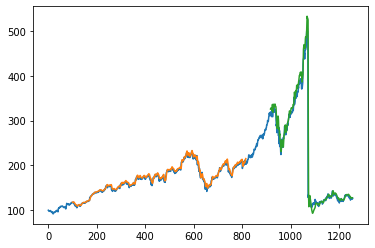

In [44]:
##plotting
## shift train prediction for plotting
look_back=100
trainpredictplot = np.empty_like(df1)
trainpredictplot[: , :] = np.nan
trainpredictplot[look_back : len(train_predict)+look_back , :] = train_predict  

##shift test prediction for plotting
testpredictplot = np.empty_like(df1)
testpredictplot[:,:]= np.nan
testpredictplot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

##plotting baseline and prediction
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainpredictplot)
plt.plot(testpredictplot)
plt.show()

In [45]:
len(test_data)


440

In [46]:
x_input = test_data[341 : ].reshape(1,-1)
x_input.shape


(1, 99)

In [47]:
temp_input = list(x_input)
temp_input =temp_input[0].tolist()

In [48]:
temp_input

[0.09025480014491002,
 0.09411906774544135,
 0.08346818017147686,
 0.09390170269291145,
 0.09663084168578676,
 0.08921627822726722,
 0.08878154812220748,
 0.09382924767540149,
 0.08904721651974398,
 0.08477237048665617,
 0.08643883588938531,
 0.0965825383407801,
 0.10827194783238739,
 0.11358531578311795,
 0.12288370969689646,
 0.12346334983697618,
 0.1208066658616109,
 0.10880328462746044,
 0.09641347663325686,
 0.10167854123898076,
 0.10373143340176308,
 0.10119550778891437,
 0.10952783480256004,
 0.10800627943485083,
 0.10836855452240066,
 0.10619490399710177,
 0.10469750030189587,
 0.10406955681680954,
 0.10464919695688926,
 0.0993841323511653,
 0.09370848931288492,
 0.09097935032000967,
 0.0913657770800628,
 0.08201907982127762,
 0.0816809564062311,
 0.08044922110856176,
 0.06991909189711384,
 0.07057118705470353,
 0.0863422291993721,
 0.0798937326409854,
 0.07250332085496922,
 0.06784204806182828,
 0.07095761381475665,
 0.0587368675280763,
 0.07014853278589542,
 0.067479772974278

In [51]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.09411907 0.08346818 0.0939017  0.09663084 0.08921628 0.08878155
 0.09382925 0.08904722 0.08477237 0.08643884 0.09658254 0.10827195
 0.11358532 0.12288371 0.12346335 0.12080667 0.10880328 0.09641348
 0.10167854 0.10373143 0.10119551 0.10952783 0.10800628 0.10836855
 0.1061949  0.1046975  0.10406956 0.1046492  0.09938413 0.09370849
 0.09097935 0.09136578 0.08201908 0.08168096 0.08044922 0.06991909
 0.07057119 0.08634223 0.07989373 0.07250332 0.06784205 0.07095761
 0.05873687 0.07014853 0.06747977 0.0722618  0.0700157  0.07716459
 0.08098056 0.07902427 0.06880811 0.06750392 0.07571549 0.0736626
 0.06774544 0.06895302 0.07045043 0.07088516 0.06728656 0.07272069
 0.07477358 0.08177756 0.08252626 0.0866079  0.09254921 0.09891317
 0.09467456 0.10237894 0.09658254 0.102548   0.10172684 0.10336916
 0.09919092 0.10013283 0.09636517 0.10211327 0.10307934 0.10228233
 0.10032605 0.10008453 0.09520589 0.09781427 0.08648714 0.08709093
 0.09105181 0.09218693 0.08407197 0.08180171 0.0742

In [58]:
day_new = np.arange(1,100)
day_pred = np.arange(101,131)


In [59]:
len(df1)

1257

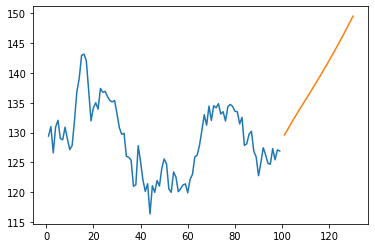

In [61]:
plt.plot(day_new , scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred , scaler.inverse_transform(lst_output))
plt.show()

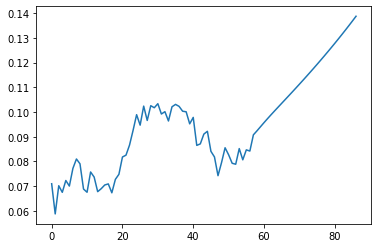

In [63]:
df3 =   df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [65]:
df3 =scaler.inverse_transform(df3).tolist()


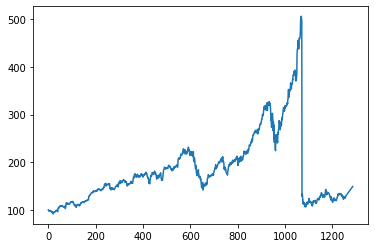

In [66]:
plt.plot(df3)